Engy-5050 Spring 2025 UMass Lowell; Prof. V. F. de Almeida **26Apr2025**

# 09. Reflected Fuel Slab Criticality
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Hmtrx}{\boldsymbol{\mathsf{H}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathscr{E}}
  \newcommand{\Lcal}{\mathscr{L}}
  \newcommand{\Dcal}{\mathscr{D}}
$


## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Vacuum Boundary Conditions](#poisson-1)
1. [Associated Eigenvalue Problem](#eigen-1)
1. [Rayleigh-Ritz or Galerkin's Method w/ Finite Element Basis Functions](#fem-1)
   + [Data](#data-1)
   + [Finite Element Lagrange Basis Functions](#fembf-1)
   + [Results](#results-1)
   + [Criticality](#criticality-1)
     - [Data](#datac-1)
     - [Results](#resultsc-1)
   + [Criticality Iterations](#criticality-2)

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D cartesian coordinates, neutron diffusion criticality problem in a reflected slab.
 + Demonstrate that a critical bare slab when reflected will go super-critical.
 + Demonstrate that the reflected slab criticality problem will require iterations on the macroscopic fission cross section value.

## [Poisson Problem with Symmetry/Neumann Boundary Conditions](#toc)<a id="poisson-1"></a>

Solve the homogeneous spatial neutron flux magnitude diffusion problem with fission. Find $u_1:[a,s]\subset\Reals\rightarrow\Reals$, $u_2:[s,b]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\bigl(-D_1\, u_1'\bigr)' + \bigl(\nu\Sigma_{f,1} - \Sigma_{a,1}\bigr)u_1 &= 0 \quad\text{in}\quad ]a,s[, \\
 -\bigl(-D_2\, u_2'\bigr)' - \Sigma_{a,2}\,u_2 &= 0 \quad\text{in}\quad ]s,b[, \\
  q_{1,n}(0) &= 0, \\
  u_1(s) &= u_2(s), \\
 q_{1,n}(s) &= q_{2,n}(s), \\
 q_{2,n}(b) &= \frac{u_2(b)}{2}, \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(x) = \flux_i(x)\cdot\normal(x) = -D_i\,u_i'(x)\,\ihat \cdot \normal(x) \ \forall \ i=1,2,3$.

The question of whether the spatial neutron flux magnitude will remain in a non-trivial steady state is deeply involved with the solution of the above problem. Consider the case where the neutron spatial flux magnitude is sustained by a distributed fission source and somewhere at the boundary of the domain the spatial flux magnitude **vanishes**. In other words, how can a neutron population density be contained in a finite region of space (to be called a reactor)? The above mathematical problem reflects the physical description just outlined (NB: a non-homogeneous Dirichlet boundary condition would not apply to the physical system described since it would effectively add a non-fission, constant source of neutrons and criticality is no longer an issue).

Since the operator above $\Dcal(\cdot) := -\bigl(-D\, u'\bigr)' (\cdot) + \bigl(\nu\Sigma_f - \Sigma_a\bigr) (\cdot)$ is almost always symmetric positive-definite, the only solution of the problem is the trivial one $u\equiv 0$. However if the operator can be made singular either via a modification of the parameters, $\nu$, $\Sigma_f$, and $\Sigma_a$, or by pure coincidence of the choice of the parameters, there will be an infinite number of non-zero solutions. The following modification of the above problem systematically calculates the specific choice of parameters that lead to a non-zero distribution of neutrons in the domain.

## [Eigenvalue Problem Statement](#toc)<a id="eigen-1"></a>

Introducing the factor $k_a$ (auxiliary neutron multiplication factor), the Poisson operator $\Dcal$ can be made singular, therefore non-zero solutions can be obtained from solving the neutron flux intensity criticality problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ and $k \in \Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)' + \bigl(\nu\Sigma_f(x) - k_a^{-1}\Sigma_a(x)\bigr)\,u &= 0 \quad \forall \quad x\in\ ]a,b[, \\
 u'(a) &= 0, \\
 q_(b) &= \frac{u(b)}{2}.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, and macroscopic absorption cross section, $\Sigma_a$.

## [Rayleigh-Ritz or Galerkin Finite Element Method](#toc)<a id="fem-1"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(b) = 0, (u'_N,u'_N) + (u_N,u_N) < \infty \bigr\}$ and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$. The Poisson energy norm is defined as $\norm{v}_{\Ecal} := (\Dcal v,v) = (v, \Dcal v)$, where $\Dcal$ is the differential operator defined by $\Dcal(\cdot) := -\bigl(-D\, u'\bigr)'(\cdot) + \bigl(k^{-1}\nu\Sigma_f - \Sigma_a\bigr)(\cdot)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - \overset{(N\times N)}{\Gmtrx_f} + 1/2\overset{(N\times N)}{\Hmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx_a}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) - (\nu\Sigma_f\,\phi_j,\phi_i) + 1/2\,\phi_j(b)\,\phi_i(b) - \lambda\,(\Sigma_a\,\phi_j,\phi_i)$
  
and $\lambda = -k_a^{-1}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions. The problem is referred to as a *generalized eigenvalue problem*.

### [Data](#toc)<a id="data-1"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 10.0 cm

> + $D_1$ = 1.44 cm
> + $\Sigma_{f,1}$ = 5.8220e-02 cm^-1
> + $\Sigma_{a,1}$ = $1.20\,\Sigma_f$
> + $\nu$ = 2.4355

> + $D_2$ = 1.85 cm
> + $\Sigma_{f,2}$ = 0
> + $\Sigma_{a,2}$ = 0.01226 cm^-1

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter

In [2]:
'''Domain'''
x_a = 0*unit.cm  
x_s = 5*unit.cm  # thickness of slab (2*x_s)
x_b = 10*unit.cm 

In [3]:
'''Domain'''
def show_domain(x_a, x_s, x_b, zoom=1):
    import pyvista as pv
    pv.set_plot_theme('paraview')
    h = 2
    source = pv.Box((x_a,x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_right = pv.Box((x_s,x_b,-h*x_s,h*x_s,-h*x_s,h*x_s))
    
    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(source, color='red', opacity=1.0,)
    plo.add_mesh(mat_right, color='tan', opacity=0.5)
    plo.add_axes(xlabel='X', ylabel='Y', zlabel='Z')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(zoom)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [ ]:
plo = show_domain(x_a, x_s, x_b)

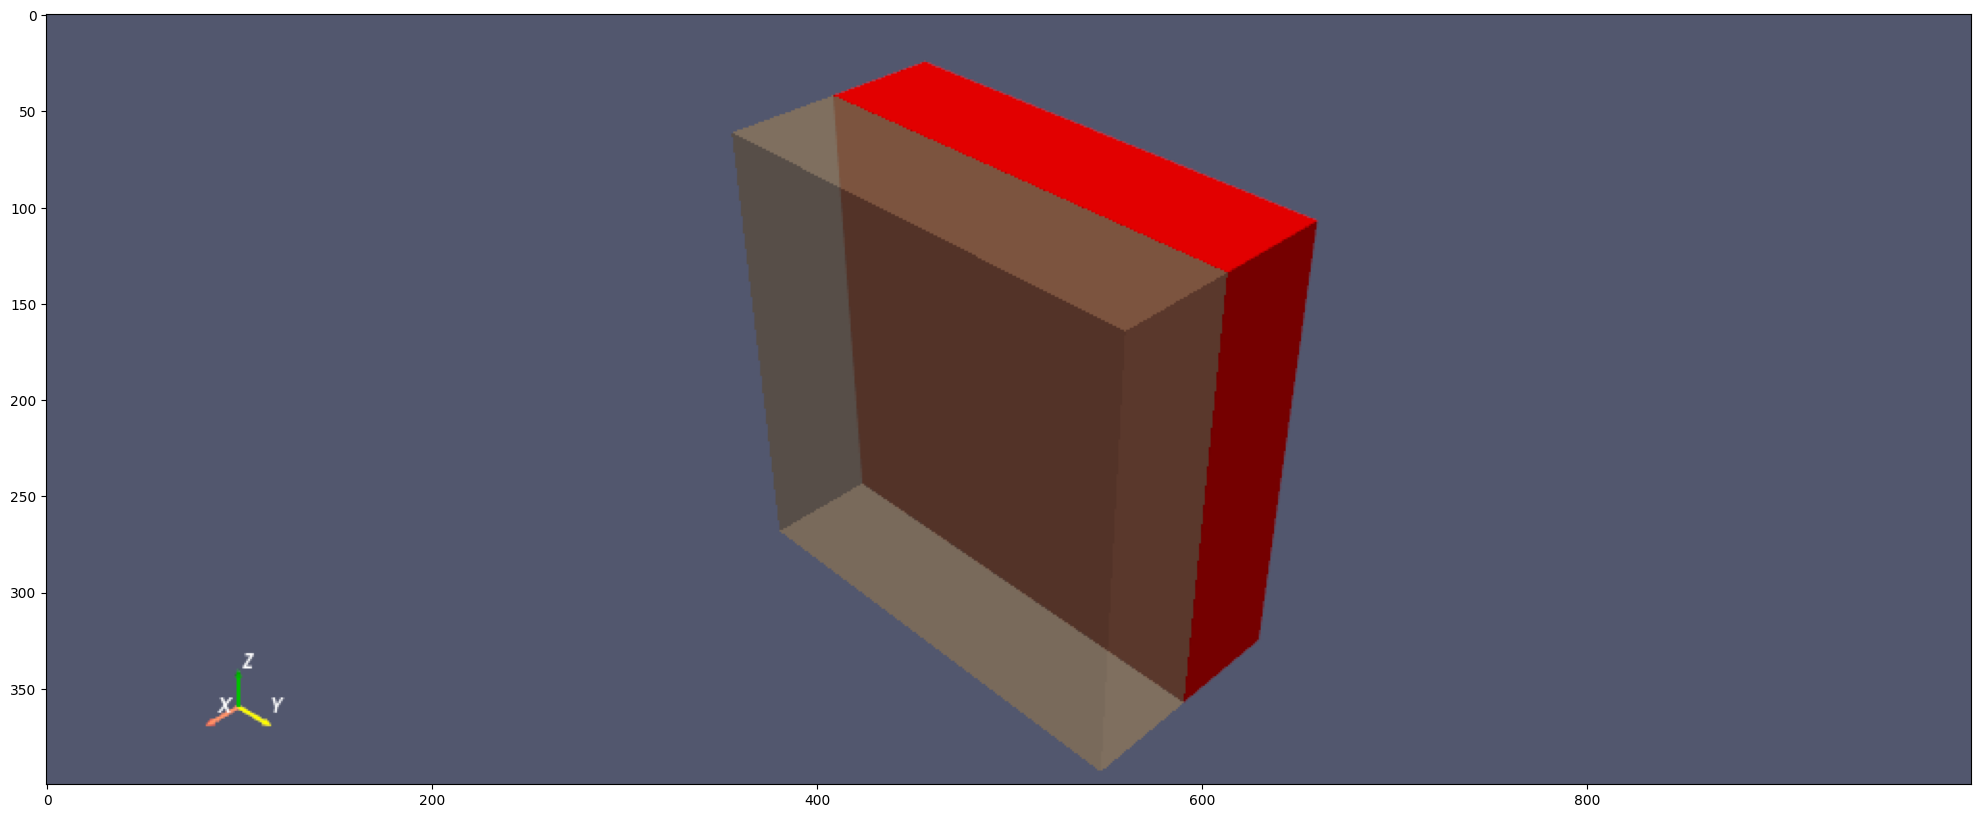

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{f1}$, $\Sigma_{a1}$,
> + $D_2$, $\Sigma_{a2}$,
> + $q_{na}$

In [6]:
'''Parameters and data'''
# Source
diffusion_coeff_1 = 1.44*unit.cm
#sigma_f_1 = 0.1/unit.cm
sigma_f_1 = 5.8220e-02/unit.cm # critical from Notebook 08 w/ vacuum BC
sigma_a_1 = sigma_f_1 * 1.20 #20% increase from fission
nu = 2.4355 # average # of neutrons per fission
# sanity check
assert sigma_a_1 >= sigma_f_1

# Reflector
diffusion_coeff_2 = 1.85*unit.cm
sigma_f_2 = sigma_f_1*1e-15 # this is to avoid rank deficiency of general. eigenproblem
sigma_f_2 = 0
sigma_a_2 = 0.01226/unit.cm
# sanity check
assert sigma_a_2 >= sigma_f_2

# Left and right normal diffusive fluxes
q_na = 0
#q_nb = u(b)/2

In [7]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 4.540e+00
L2 [cm] = 1.228e+01


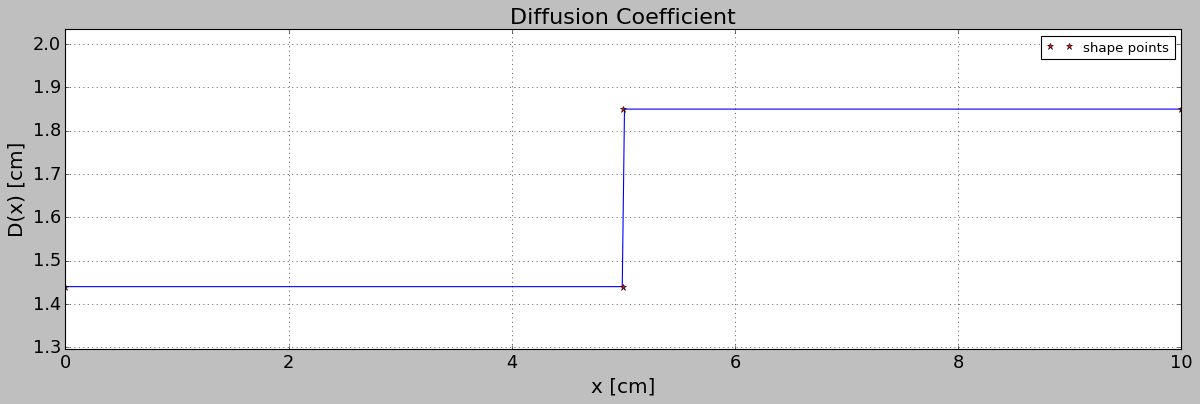

In [8]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(x_a, diffusion_coeff_1), (x_s, diffusion_coeff_1), 
             (x_s, diffusion_coeff_2), (x_b, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

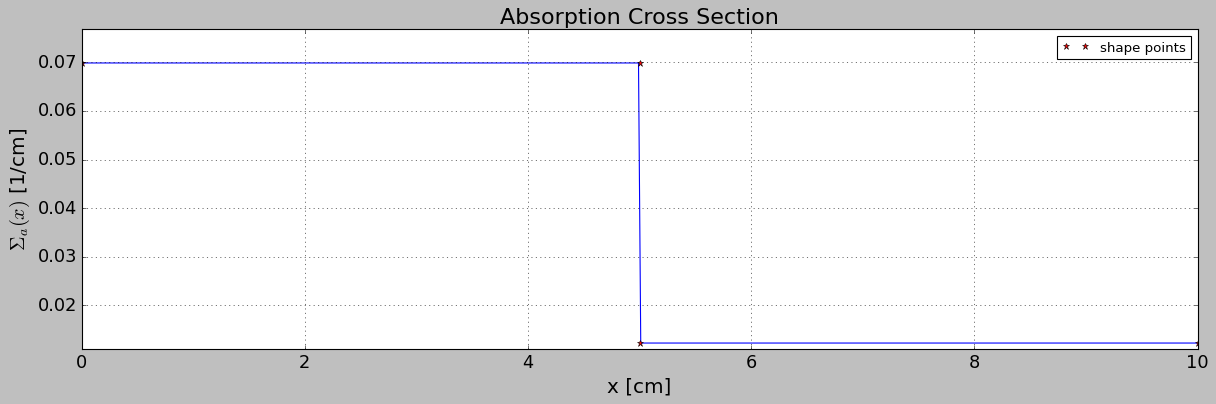

In [9]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_1), (x_s, sigma_a_1), 
             (x_s, sigma_a_2), (x_b, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

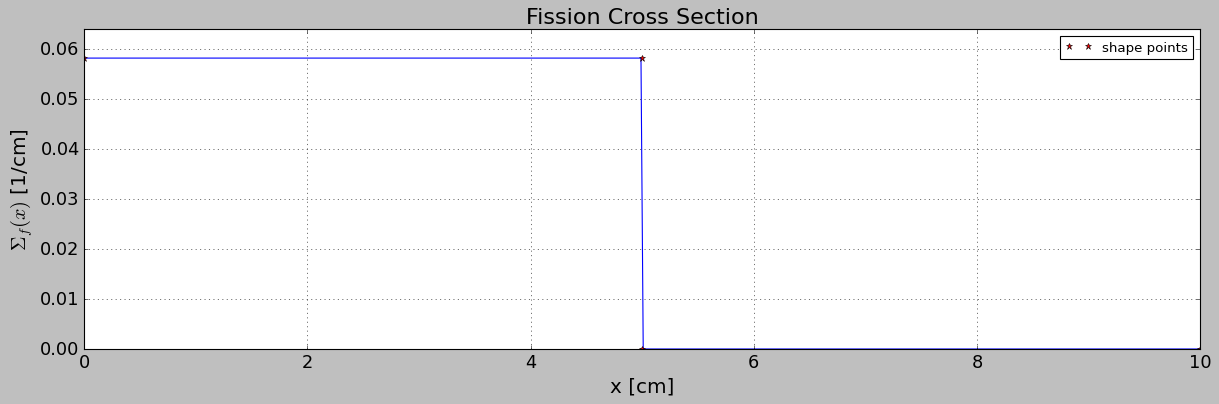

In [10]:
'''Fission cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_f_1), (x_s, sigma_f_1), 
             (x_s, sigma_f_2), (x_b, sigma_f_2)]

sigma_f = TargetFunction(shape_pts, type='linear')
  
sigma_f.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Fission Cross Section', y_label=r'$\Sigma_f(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_f_1, sigma_f_2)*unit.cm*.9, 
                   max(sigma_f_1, sigma_f_2)*unit.cm*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-1"></a>

Specify basis functions distribution on the material domain and degree.

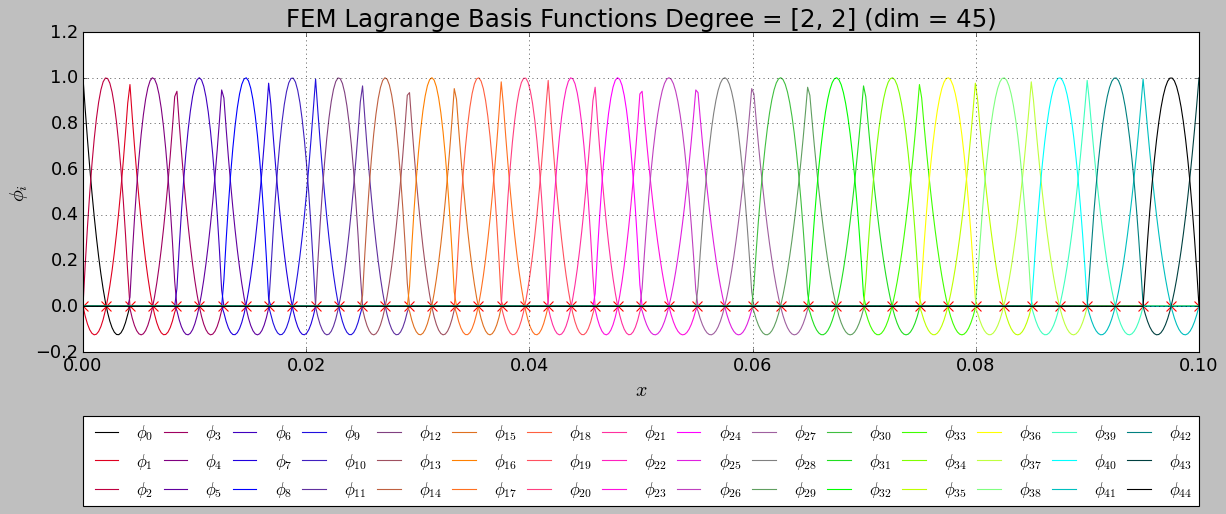

In [11]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2]
n_elem = [12,10] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) - (\nu\Sigma_f\,\phi_j,\phi_i) + 1/2\,\phi_j(b)\,\phi_i(b) - \lambda\,(\Sigma_a\,\phi_j,\phi_i)$

In [12]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
gf_mtrx = nu*femlb.inner_product_matrix(sigma_f, 'u', 'v')
h_mtrx = femlb.boundary_inner_product_matrix('right', lambda x: 1/2, 'u', 'v')
ga_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

In [13]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
import numpy as np   
if np.linalg.matrix_rank(d_mtrx) == d_mtrx.shape[1]:
    print('D is full rank.')
else:
    print('D is rank deficient.')

if np.linalg.matrix_rank(h_mtrx) == h_mtrx.shape[1]:
    print('H is full rank.')
else:
    print('H is rank deficient.')

if np.linalg.matrix_rank(d_mtrx+h_mtrx) == h_mtrx.shape[1]:
    print('D+H is full rank.')
else:
    print('D+H is rank deficient.')
    
import numpy as np
if np.linalg.matrix_rank(gf_mtrx) == gf_mtrx.shape[1]:
    print('Gf is full rank.')
else:
    print('Gf is rank deficient.')
    
if np.linalg.matrix_rank(ga_mtrx) == ga_mtrx.shape[1]:
    print('Ga is full rank.')
else:
    print('Ga is rank deficient.')

D is rank deficient.
H is rank deficient.
D+H is full rank.
Gf is rank deficient.
Ga is full rank.


In [14]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx-gf_mtrx+h_mtrx, ga_mtrx)

In [15]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda [cm^-1] = ', lambda_vec[:5]*unit.cm)

lambda [cm^-1] =  [-0.01465  0.05981  0.21385  0.38645  0.71737]


In [16]:
'''Eigenvalues'''
ka_vec = -1/lambda_vec
k_vec = 1/(1+sigma_a(x_a)/nu/sigma_f(x_a)*(lambda_vec+1))
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.2976  0.22524 0.08313 0.0487  0.02715]


In [17]:
'''Double checking operator singularity (only first 5 eigenvalues)'''
for ka in ka_vec[:5]:
    a_mtrx = d_mtrx - gf_mtrx + h_mtrx + 1/ka*ga_mtrx
    if np.linalg.matrix_rank(a_mtrx) != a_mtrx.shape[1]:
        print('Singular matrix')

Singular matrix
Singular matrix
Singular matrix
Singular matrix
Singular matrix


In [18]:
'''Probability of non-leakage per mode'''
for k in k_vec[:5]:
    k_oo = k * (lambda_vec[0]+1)/(1-k)
    p_nl = k/k_oo
    if k_oo >= 0.0 and p_nl >= 0.0:
        print('P_NL = ', p_nl)
        print('k_oo = ', k_oo)

P_NL =  0.6393408533499748
k_oo =  2.029583333333334


### [Results](#toc)<a id="results-1"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [19]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [20]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [21]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff(x)*u_prime_star(x, c_star_vec)

In [22]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(x_a, x_b, 20)

# Normalized eigenvector
c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])

# Note that u values are only determined up to a multiplying factor
u_values = u_star(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_norm_factor = u_values[normalizing_val[0]]
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_norm_factor = flux_values[normalizing_val[0]]
flux_values /= flux_norm_factor

print('k = %2.5e'%k_vec[0])
print('')

print("   x [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)
    
print('u normalization value [#/cm^2-s] = %2.8e'%(u_norm_factor*unit.cm**2))
print('q normalization value [#/cm^2-s] = %2.8e'%(flux_norm_factor*unit.cm**2))

k = 1.29760e+00

   x [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00002
 2)  0.53        0.99621       0.12029
 3)  1.05        0.98488       0.23963
 4)  1.58        0.96608       0.35724
 5)  2.11        0.93996       0.47224
 6)  2.63        0.90672       0.58332
 7)  3.16        0.86661       0.69012
 8)  3.68        0.81994       0.79194
 9)  4.21        0.76705       0.88767
10)  4.74        0.70835       0.97627
11)  5.26        0.65224       1.00000
12)  5.79        0.60411       0.96551
13)  6.32        0.55760       0.93360
14)  6.84        0.51259       0.90421
15)  7.37        0.46896       0.87724
16)  7.89        0.42659       0.85263
17)  8.42        0.38538       0.83031
18)  8.95        0.34519       0.81022
19)  9.47        0.30594       0.79230
20)  10.00        0.26751       0.77652
u normalization value [#/cm^2-s] = 2.02750788e-05
q normalization value [#/cm^2-s] = 3.49167808e-06


In [23]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', u_star(x_a, c_star_vec)[0], ' u_N(b) = ', u_star(x_b, c_star_vec)[0])

u_N(a) =  0.20275078801014654  u_N(b) =  0.05423811826529363


In [24]:
left_flux = (u_flux_x(x_a, c_star_vec)[0], 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
print('left normal diff. flux =', left_normal_flux)

left normal diff. flux = -5.271611221019156e-07


In [25]:
'''Flux at interface'''

q_ns_N = u_flux_x(x_s*.999, c_star_vec)[0]*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)

q_ns computed [#/(cm^2 s)]=  3.553601145263251e-06


In [26]:
'''Flux at interface'''

q_ns_N = u_flux_x(x_s*1.001, c_star_vec)[0]*unit.cm**2*unit.second
print('q_ns computed [#/(cm^2 s)]= ', q_ns_N)

q_ns computed [#/(cm^2 s)]=  3.5531342183643416e-06


In [27]:
right_flux = (u_flux_x(x_b, c_star_vec)[0], 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
print('right normal diff. flux =', right_normal_flux)

right normal diff. flux = 0.027113531204612906


In [28]:
'''Total power (integrated source)'''
from scipy.integrate import quad
source = lambda x: (nu*sigma_f(x) - sigma_a(x)/ka_vec[0]) * u_star(x, c_star_vec)
(total_power_1, _) = quad(source, x_a, x_s)
(total_power_2, _) = quad(source, x_s, x_b)
total_power = total_power_1 + total_power_2
print('integrated source [#/(cm^2 s) =', total_power)

integrated source [#/(cm^2 s) = 0.027119059259329618


In [29]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%((left_normal_flux + right_normal_flux - total_power)/total_power*100))

Total flux balance relative error [%] = -0.02 


In [30]:
'''Plot neutron flux modes'''
from pyfem1d.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(x_a, x_b, n_pts)
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        u_values /= u_values[normalizing_val[0]]

        u_flux_x_values = u_flux_x(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        u_flux_x_values /= u_flux_x_values[normalizing_val[0]]

        ax1.plot(x/unit.cm, u_values, '-', label=r'Solution $k$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.cm, u_flux_x_values,'--', color=colors[j], label='Flux $k$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Reflected Fuel Slab Modes ($k$=%s # elem=%s, N=%i)'%(k_vec,n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

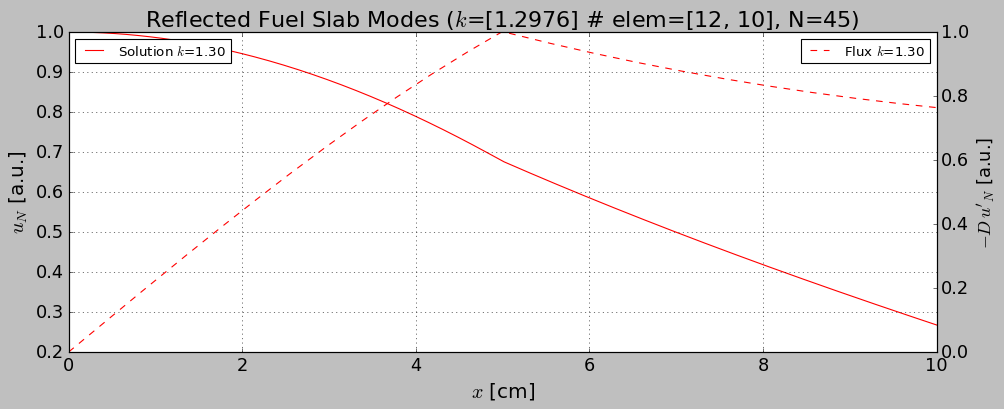

In [31]:
plot_modes(k_vec[0:1], eigen_vec[:,0:1])

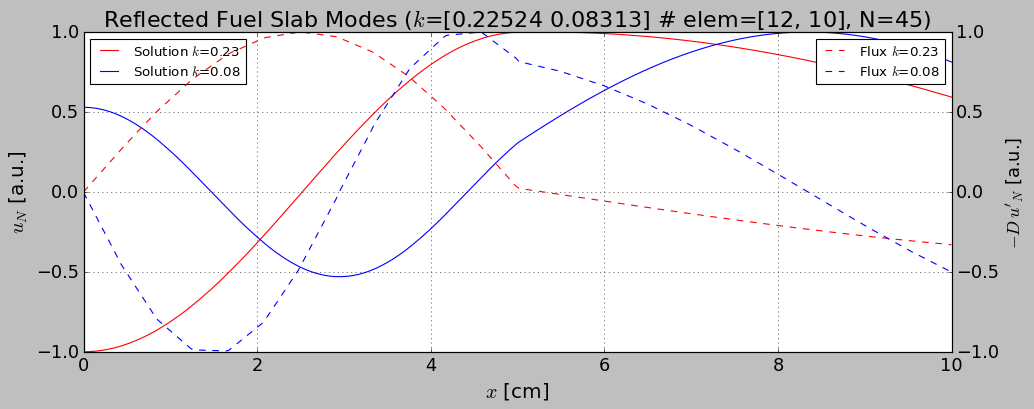

In [32]:
plot_modes(k_vec[1:3], eigen_vec[:,1:3])

### [Criticality Iterations](#toc)<a id="criticality-2"></a>

#### [Data](#toc)<a id="datac-1"></a>

Solve problem with the modified parameter:

> + $\Sigma_{fc}$

*Assume all other parameters to remain the same.* This assumption is unlikely to hold because $D$ will likely change and an iterative process must be used even for a simpler problem.

In [33]:
for i in range(3):
    # New sigma_f critical
    sigma_f_1 = sigma_f(x_a) / k_vec[0]
    print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_1*unit.cm))
    # Build the matrix of coefficients of the linear system
    # Note that the G_f matrix of the eigenvalue problem is not the same as previously stated
    shape_pts = [(x_a, sigma_f_1), (x_s, sigma_f_1), 
                 (x_s, sigma_f_2), (x_b, sigma_f_2)]
    sigma_f = TargetFunction(shape_pts, type='linear')
    gf_mtrx = nu*femlb.inner_product_matrix(sigma_f, 'u', 'v')
    # Compute optimal coefficient eigenvectors
    lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx+h_mtrx-gf_mtrx, ga_mtrx)
    # Eigenvalues
    ka_vec = -1/lambda_vec
    k_vec = 1/(1+sigma_a(x_a)/nu/sigma_f(x_a)*(lambda_vec+1))
    print('k = ',k_vec[:5])

Sigma_f critical = 4.4868e-02 [1/cm]
k =  [1.01471 0.17555 0.06467 0.03766 0.02094]
Sigma_f critical = 4.4217e-02 [1/cm]
k =  [1.00073 0.1731  0.06376 0.03712 0.02064]
Sigma_f critical = 4.4185e-02 [1/cm]
k =  [1.00004 0.17298 0.06372 0.03709 0.02062]


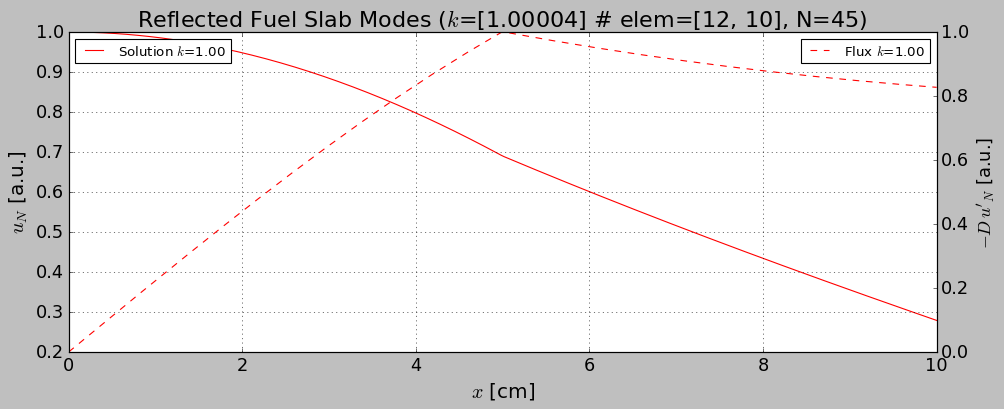

In [34]:
plot_modes(k_vec[0:1], eigen_vec[:,0:1])

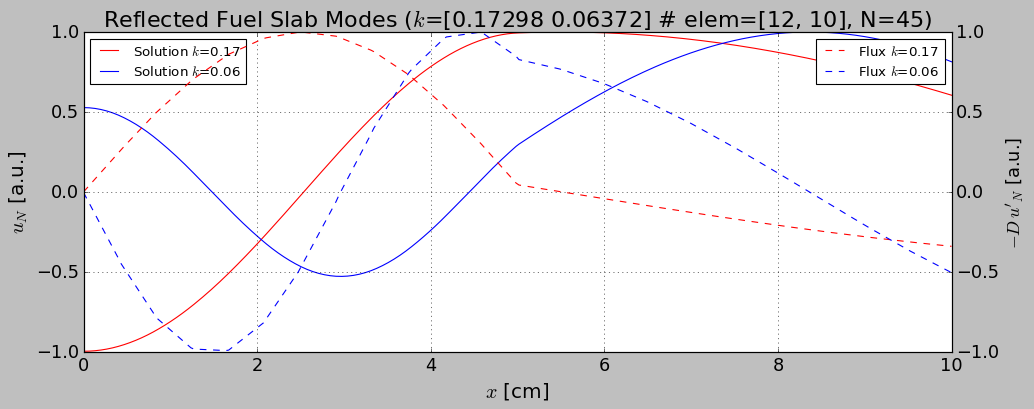

In [35]:
plot_modes(k_vec[1:3], eigen_vec[:,1:3])

In [36]:
'''Probability of non-leakage per mode'''
for k in k_vec[:5]:
    k_oo = k * (lambda_vec[0]+1)/(1-k)
    p_nl = k/k_oo
    if k_oo >= 0.0 and p_nl >= 0.0:
        print('P_NL = ', p_nl)
        print('k_oo = ', k_oo)

P_NL =  0.6492454081402971
k_oo =  1.5403061713530424
